# EAD - This notebook will calculate the distribution of resolutions we have in our training images and how many images we have for each class.

Results: From this preliminary analysis we can see that we have some class imbalance in training. The least represented class has 210 observations while the most represented class has 2250.

Additionally, when looking at the average resolution of pictures we found that:

* Average number of pixels per image: 3109.63
* Average image is 56 by 56 pixels - approximately

In [1]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Loading images - from Datacamp CNN course (cloud example)
from torchvision.datasets import ImageFolder
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Resize((32,32)) #No resizing since we want to get the distribution
    #of the original resolutions
])



dataset_train = ImageFolder(
    '/content/drive/MyDrive/BU_MSBA/BA865 - Neural Networks/BA865 - Group Project/GTSRBkaggle/Train'

)

Number of images per class:
Class 00: 210
Class 01: 2220
Class 02: 2250
Class 03: 1410
Class 04: 1980
Class 05: 1860
Class 06: 430
Class 07: 1440
Class 08: 1410
Class 09: 1470
Class 10: 2010
Class 11: 1320
Class 12: 2100
Class 13: 2160
Class 14: 780
Class 15: 630
Class 16: 420
Class 17: 1110
Class 18: 1200
Class 19: 210
Class 20: 360
Class 21: 330
Class 22: 390
Class 23: 510
Class 24: 270
Class 25: 1500
Class 26: 600
Class 27: 240
Class 28: 540
Class 29: 270
Class 30: 450
Class 31: 780
Class 32: 240
Class 33: 689
Class 34: 420
Class 35: 1200
Class 36: 390
Class 37: 210
Class 38: 2070
Class 39: 300
Class 40: 360
Class 41: 240
Class 42: 240


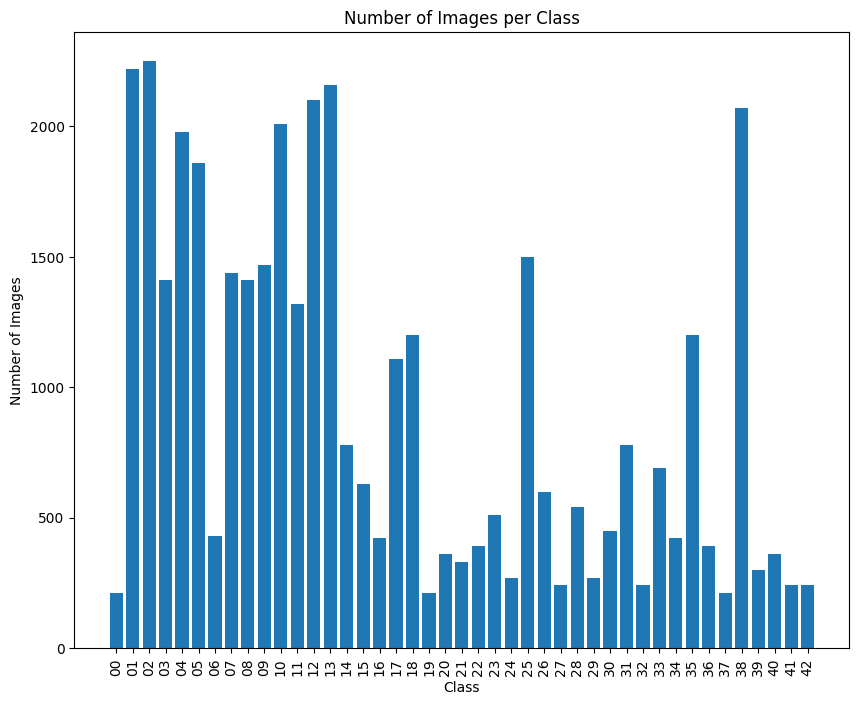

In [3]:
#Counting how many images we have for each class
import matplotlib.pyplot as plt

#Initiate an empty dictionary
class_counts = {}

#Iterate over imgs in dataset_train - which returns the image path and it's
#class label.
for _, label in dataset_train.imgs:

    #Create temp class label
    class_label = dataset_train.classes[label]

    #If the class label is in the dictionary already we add to it, if not
    #we add it to the dictionary and start its value at 1
    if class_label in class_counts:
        class_counts[class_label] += 1
    else:
        class_counts[class_label] = 1

#Print the number of images per class
print("Number of images per class:")
for class_name, count in class_counts.items():
    print(f"Class {class_name}: {count}")

#Plot the distribution
plt.figure(figsize=(10, 8))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#hbcshc

The next block takes approximately: 3h to run

* I'll try to improve it in another version

In [6]:
#Counting how many images we have for each resolution
import imageio.v2 as imageio

#Initiate an empty dictionary for resolutions
resolution_counts = {}

#Iterate over each image path

iteration = 0

for img_path, _ in dataset_train.imgs:

    #Load image
    image = imageio.imread(img_path)

    #Get the total resolution
    total_resolution = (image.shape[1], image.shape[0])

    #Following a similar approach to the classes, if the resolution pair
    #is not in the dictionary we create an entry, if it is we add 1 to the count
    if total_resolution in resolution_counts:
        resolution_counts[total_resolution] += 1
    else:
        resolution_counts[total_resolution] = 1

    #Keep track of iteration - check to see if code is working
    if iteration % 1000 == 0:

      print('iteration:', iteration)

    iteration += 1

#Display resolution distribution
print("Resolution distribution:")
for total_resolution, count in sorted(resolution_counts.items()):
    print(f"{total_resolution}: {count}")

iteration: 0
iteration: 1000
iteration: 2000
iteration: 3000
iteration: 4000
iteration: 5000
iteration: 6000
iteration: 7000
iteration: 8000
iteration: 9000
iteration: 10000
iteration: 11000
iteration: 12000
iteration: 13000
iteration: 14000
iteration: 15000
iteration: 16000
iteration: 17000
iteration: 18000
iteration: 19000
iteration: 20000
iteration: 21000
iteration: 22000
iteration: 23000
iteration: 24000
iteration: 25000
iteration: 26000
iteration: 27000
iteration: 28000
iteration: 29000
iteration: 30000
iteration: 31000
iteration: 32000
iteration: 33000
iteration: 34000
iteration: 35000
iteration: 36000
iteration: 37000
iteration: 38000
iteration: 39000
Resolution distribution:
(25, 25): 7
(25, 26): 17
(25, 27): 21
(25, 28): 4
(25, 29): 1
(25, 30): 1
(25, 31): 1
(25, 32): 1
(25, 40): 1
(26, 25): 21
(26, 26): 85
(26, 27): 108
(26, 28): 70
(26, 29): 27
(26, 30): 7
(26, 31): 5
(26, 32): 6
(26, 33): 4
(26, 34): 1
(26, 35): 1
(26, 40): 1
(26, 42): 1
(26, 55): 1
(26, 56): 1
(26, 57): 1


In [12]:
#Retrieving average resolution

#Initialize total pixels and total images count
total_pixels = 0
total_images = 0

#Iterate through the resolution counts dictionary
for resolution, count in resolution_counts.items():
    width, height = resolution

    #Calculate total pixels for this resolution - most are one but we learned this
    #after running the code
    pixels = width * height * count
    total_pixels += pixels

    #Increase the total image count
    total_images += count

# Calculate average pixels per image
average_pixels_per_image = total_pixels / total_images

# Display the average pixels per image
print(f'Average number of pixels per image: {average_pixels_per_image}')
print(f'Achieved through a {round((average_pixels_per_image)**0.5)} by {round((average_pixels_per_image)**0.5)} image - approximately')


Average number of pixels per image: 3109.625130676458
Achieved through a 56 by 56 image - approximately
